In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis

In [25]:
df = pd.read_csv("C:/Users/gabri/OneDrive/Documents/Faculdade/2024.2/Projeto de Ciência de Dados/novo/volleyball-case-study/pre-processing/dados_processados_sem_normalizar.csv")

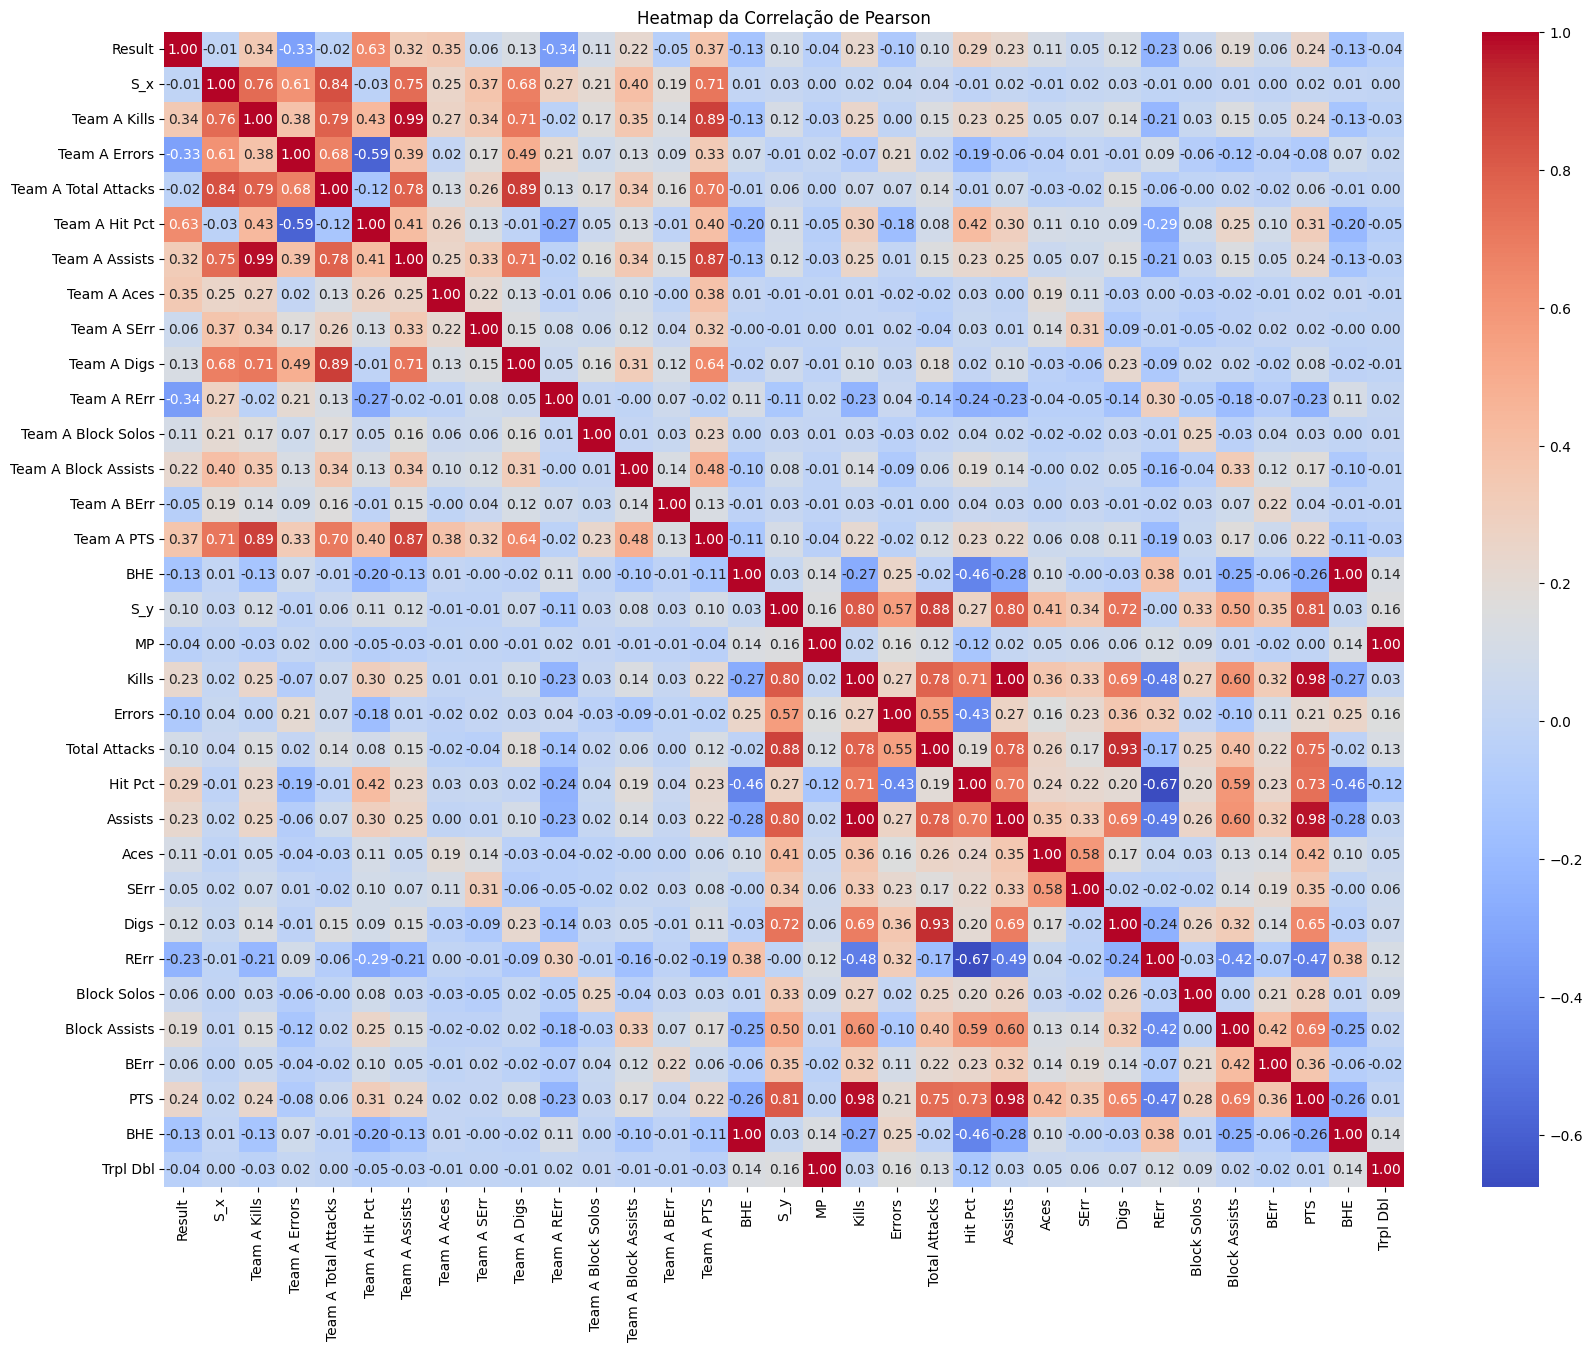

In [26]:
colunas_para_correlacionar = [
     'Result', 'S_x', 'Team A Kills', 'Team A Errors',
    'Team A Total Attacks', 'Team A Hit Pct', 'Team A Assists',
    'Team A Aces', 'Team A SErr', 'Team A Digs', 'Team A RErr',
    'Team A Block Solos', 'Team A Block Assists', 'Team A BErr',
    'Team A PTS', 'BHE','S_y','MP','Kills','Errors','Total Attacks','Hit Pct','Assists','Aces','SErr','Digs','RErr','Block Solos','Block Assists','BErr','PTS','BHE','Trpl Dbl'
]

#Calcular a correlação de Pearson
correlacao = df[colunas_para_correlacionar].corr(method='pearson')

plt.figure(figsize=(20, 15))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap da Correlação de Pearson')
plt.show()

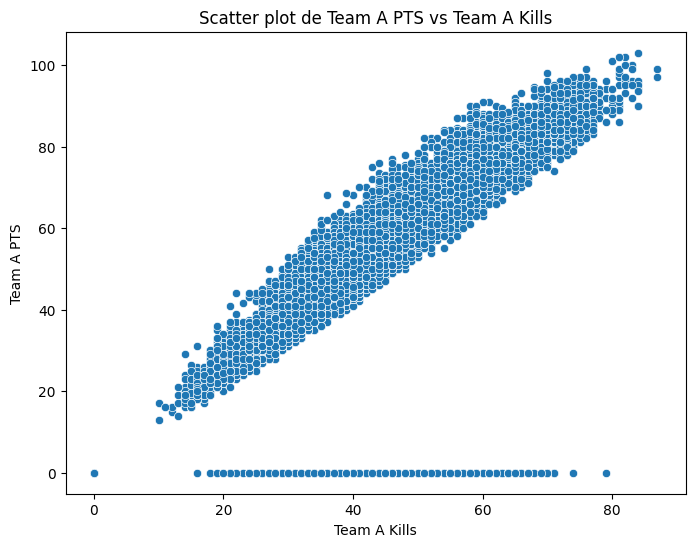

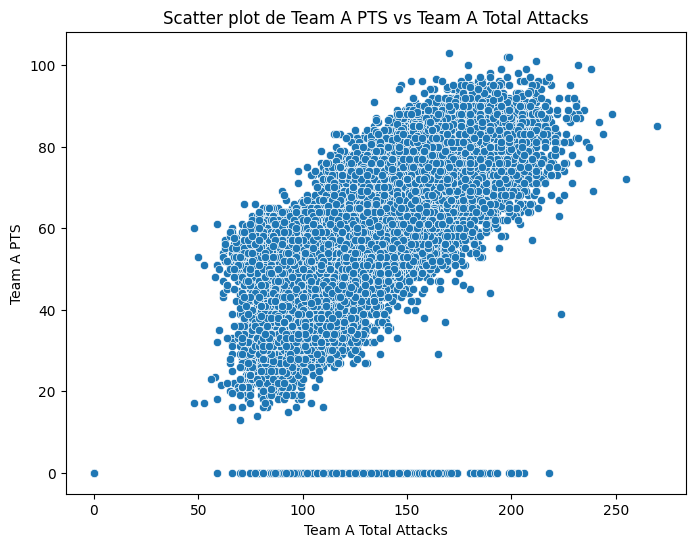

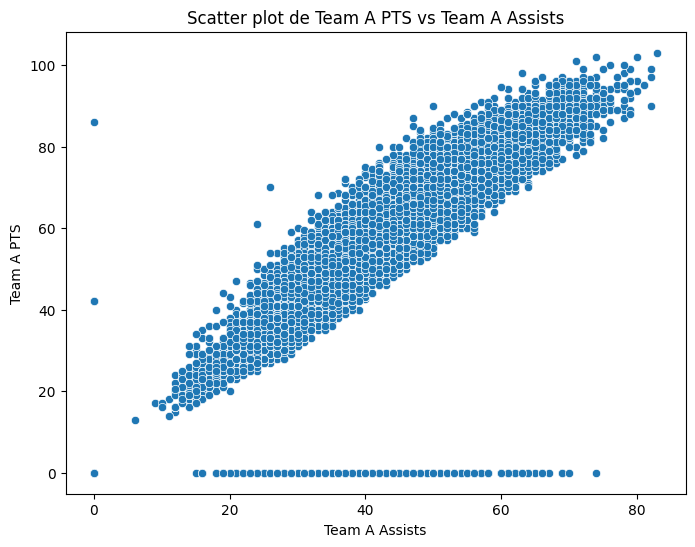

In [27]:
variaveis_para_comparar = ['Team A Kills', 'Team A Total Attacks', 'Team A Assists']

for variavel in variaveis_para_comparar:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=variavel, y='Team A PTS')
    plt.title(f'Scatter plot de Team A PTS vs {variavel}')
    plt.xlabel(variavel)
    plt.ylabel('Team A PTS')
    plt.show()

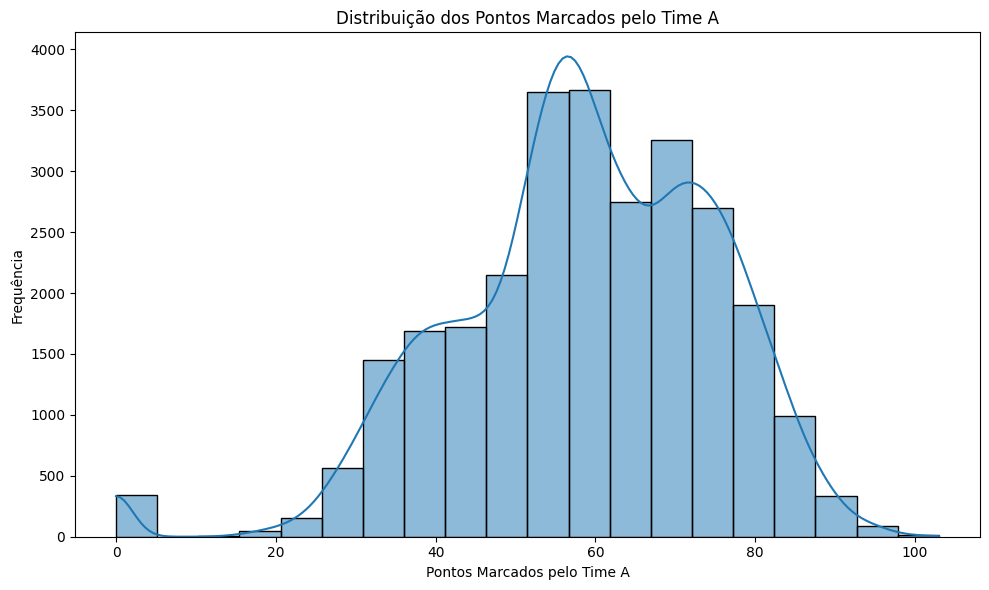

In [28]:
#Criando um histograma para a coluna 'Team A PTS' para analisar a distribuição dos pontos
plt.figure(figsize=(10, 6))
sns.histplot(df['Team A PTS'].dropna(), bins=20, kde=True)
plt.title('Distribuição dos Pontos Marcados pelo Time A')
plt.xlabel('Pontos Marcados pelo Time A')
plt.ylabel('Frequência')
plt.tight_layout()

# Exibindo o histograma
plt.show()

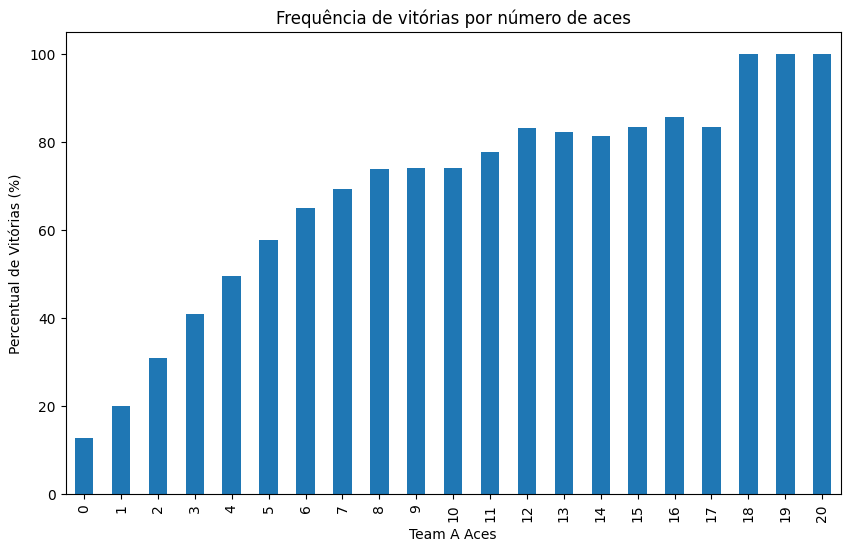

In [29]:
vitorias_por_aces = df.groupby('Team A Aces')['Result'].agg(['count', 'sum'])

# 2. Calcular a porcentagem de vitórias para cada quantidade de aces
vitorias_por_aces['percentual_vitorias'] = (vitorias_por_aces['sum'] / vitorias_por_aces['count']) * 100

vitorias_por_aces['percentual_vitorias'].plot(kind='bar', figsize=(10, 6))
plt.title('Frequência de vitórias por número de aces')
plt.xlabel('Team A Aces')
plt.ylabel('Percentual de Vitórias (%)')
plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_2120\3244995712.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_total_binned = df.groupby('Digs_Binned')['Result'].count().reset_index(name='Total_Jogos')
C:\Users\gabri\AppData\Local\Temp\ipykernel_2120\3244995712.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_victories_binned = df.groupby('Digs_Binned')['Result'].sum().reset_index(name='Vitorias')


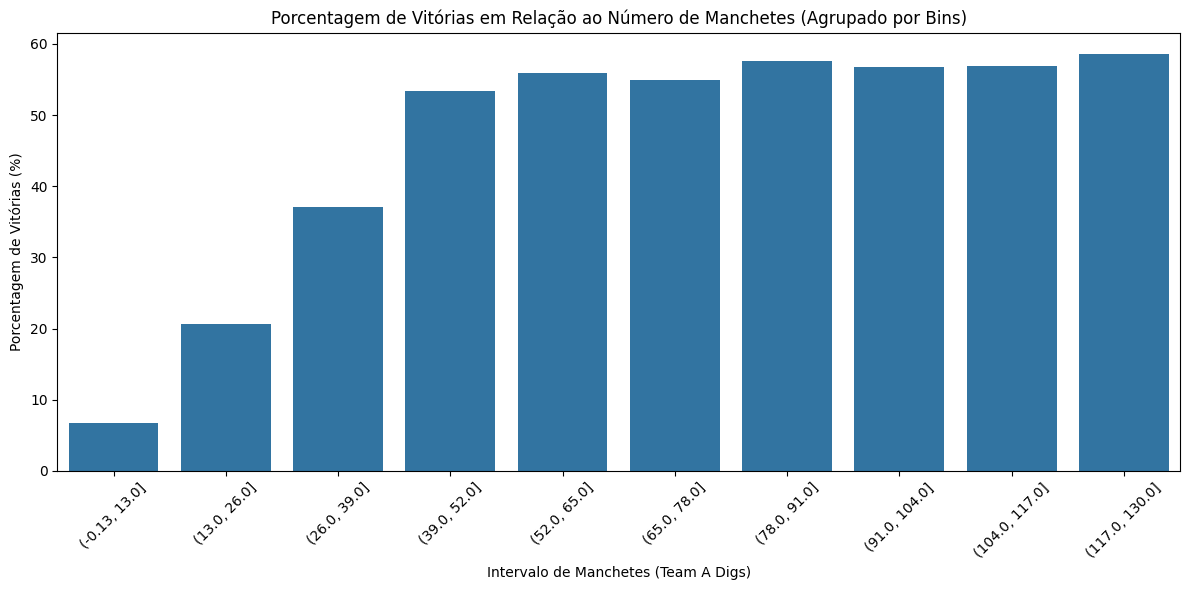

In [30]:
# Definir os intervalos (bins) de número de manchetes
df['Digs_Binned'] = pd.cut(df['Team A Digs'], bins=10)

# Contando o número total de jogos e vitórias para cada intervalo de 'Team A Digs'
df_grouped_total_binned = df.groupby('Digs_Binned')['Result'].count().reset_index(name='Total_Jogos')
df_grouped_victories_binned = df.groupby('Digs_Binned')['Result'].sum().reset_index(name='Vitorias')

# Unindo os dois dataframes
df_grouped_binned = pd.merge(df_grouped_total_binned, df_grouped_victories_binned, on='Digs_Binned')

# Calculando a porcentagem de vitórias
df_grouped_binned['Porcentagem_Vitorias'] = (df_grouped_binned['Vitorias'] / df_grouped_binned['Total_Jogos']) * 100

# Criando o gráfico de barras com a porcentagem de vitórias para os intervalos de manchetes
plt.figure(figsize=(12, 6))
sns.barplot(x='Digs_Binned', y='Porcentagem_Vitorias', data=df_grouped_binned, errorbar=None)
plt.title('Porcentagem de Vitórias em Relação ao Número de Manchetes (Agrupado por Bins)')
plt.xlabel('Intervalo de Manchetes (Team A Digs)')
plt.ylabel('Porcentagem de Vitórias (%)')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

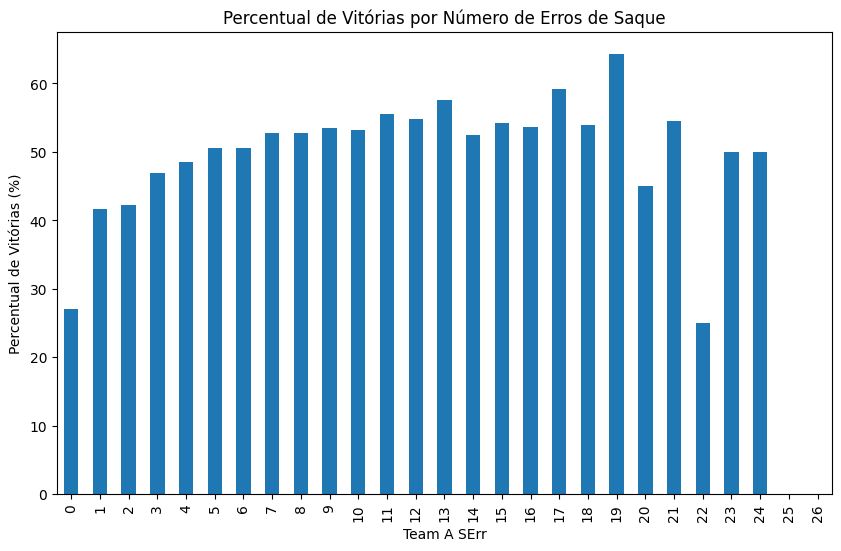

In [31]:
# Agrupando por erros de saque e calculando a média de vitórias
vitorias_por_serr = df.groupby('Team A SErr')['Result'].agg(['count', 'sum'])
vitorias_por_serr['percentual_vitorias'] = (vitorias_por_serr['sum'] / vitorias_por_serr['count']) * 100

# Criando o gráfico
plt.figure(figsize=(10, 6))
vitorias_por_serr['percentual_vitorias'].plot(kind='bar')
plt.title('Percentual de Vitórias por Número de Erros de Saque')
plt.xlabel('Team A SErr')
plt.ylabel('Percentual de Vitórias (%)')
plt.show()


C:\Users\gabri\AppData\Local\Temp\ipykernel_2120\2004129224.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vitorias_por_kills_binned = df.groupby('Kills_Binned')['Result'].agg(['count', 'sum'])


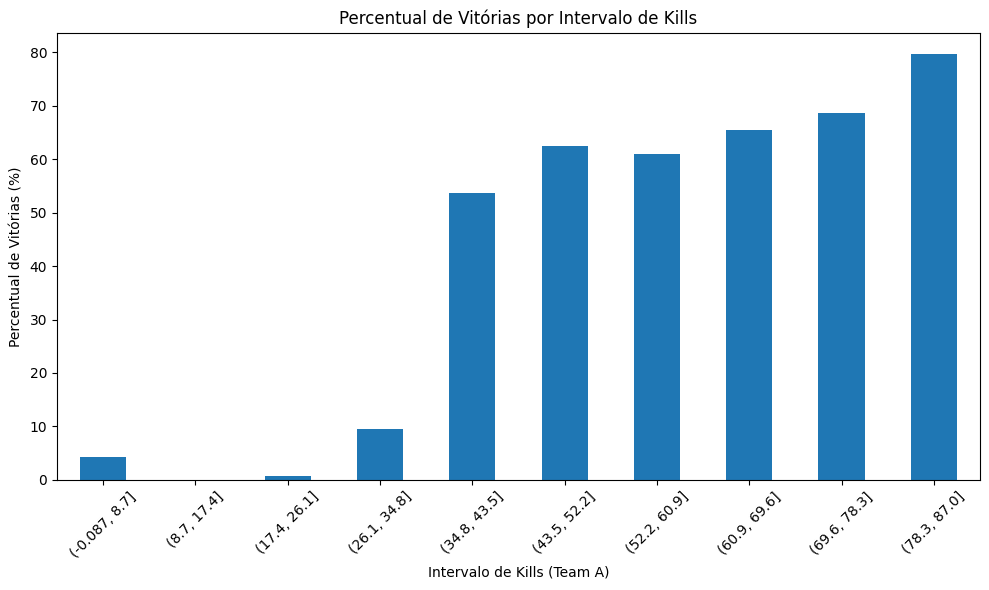

In [32]:
# Definir os intervalos (bins) para agrupar os kills
df['Kills_Binned'] = pd.cut(df['Team A Kills'], bins=10)  # Dividindo os kills em 10 intervalos

# Agrupar pelos bins de Kills e calcular a média de vitórias
vitorias_por_kills_binned = df.groupby('Kills_Binned')['Result'].agg(['count', 'sum'])
vitorias_por_kills_binned['percentual_vitorias'] = (vitorias_por_kills_binned['sum'] / vitorias_por_kills_binned['count']) * 100

# Criando um gráfico de barras para visualizar a porcentagem de vitórias por intervalo de Kills
plt.figure(figsize=(10, 6))
vitorias_por_kills_binned['percentual_vitorias'].plot(kind='bar')
plt.title('Percentual de Vitórias por Intervalo de Kills')
plt.xlabel('Intervalo de Kills (Team A)')
plt.ylabel('Percentual de Vitórias (%)')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()

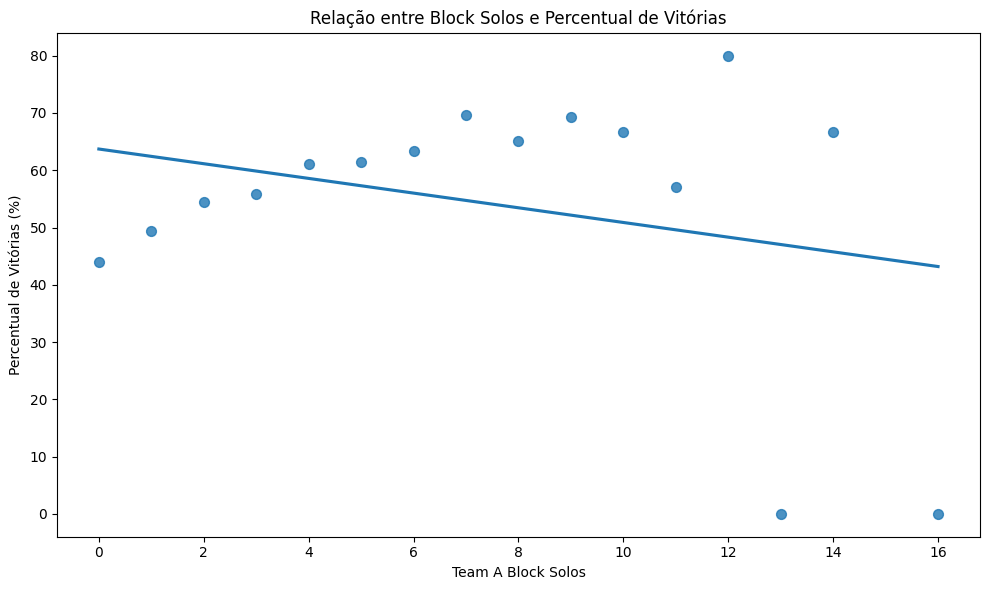

In [33]:
# Agrupar os dados pela quantidade de Block Solos e calcular a porcentagem de vitórias
vitorias_por_block = df.groupby('Team A Block Solos')['Result'].agg(['count', 'sum'])
vitorias_por_block['percentual_vitorias'] = (vitorias_por_block['sum'] / vitorias_por_block['count']) * 100

# Resetando o índice para usar no gráfico
vitorias_por_block = vitorias_por_block.reset_index()

# Criando o gráfico de dispersão com regressão
plt.figure(figsize=(10, 6))
sns.regplot(x='Team A Block Solos', y='percentual_vitorias', data=vitorias_por_block, scatter_kws={'s': 50}, ci=None)
plt.title('Relação entre Block Solos e Percentual de Vitórias')
plt.xlabel('Team A Block Solos')
plt.ylabel('Percentual de Vitórias (%)')
plt.tight_layout()

# Exibir o gráfico
plt.show()

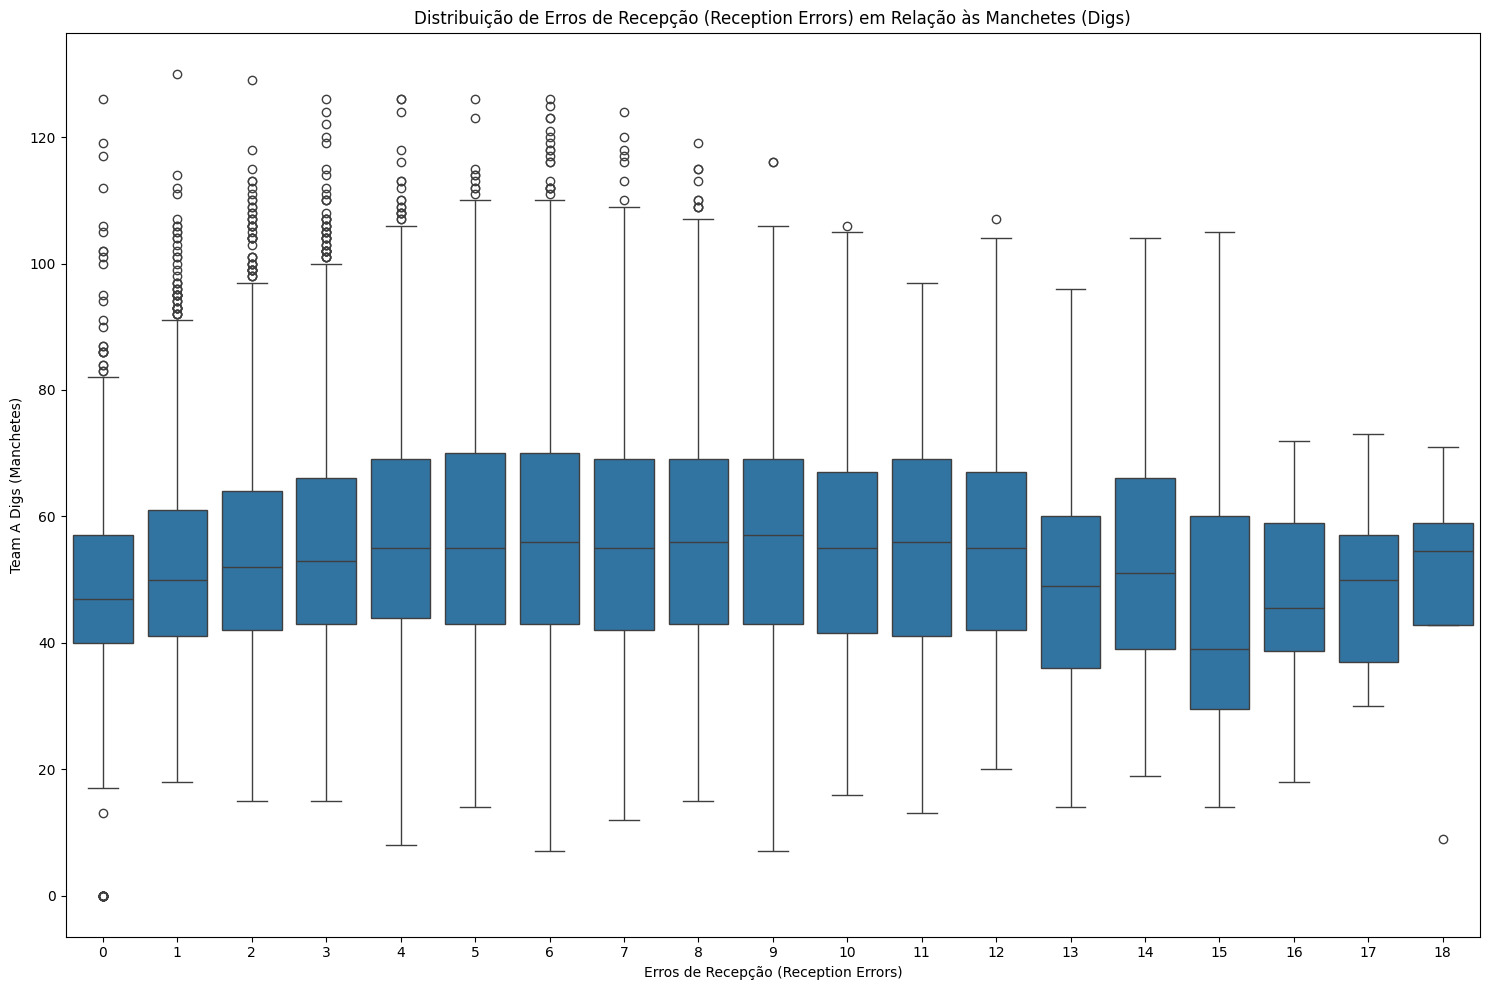

In [34]:
# Criando um boxplot de Reception Errors vs. Digs (Manchetes)
plt.figure(figsize=(15, 10))
sns.boxplot(x='Team A RErr', y='Team A Digs', data=df)
plt.title('Distribuição de Erros de Recepção (Reception Errors) em Relação às Manchetes (Digs)')
plt.xlabel('Erros de Recepção (Reception Errors)')
plt.ylabel('Team A Digs (Manchetes)')
plt.tight_layout()

# Exibir o gráfico
plt.show()


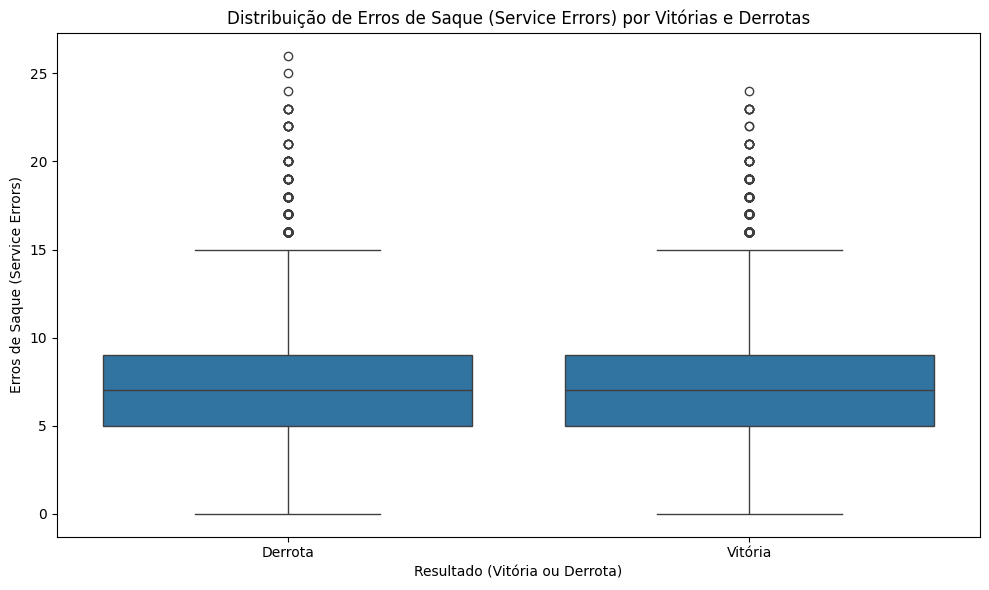

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criando uma nova coluna para marcar jogos vencedores (1 = Vitória, 0 = Derrota)
df['Vitórias'] = df['Result'].apply(lambda x: 'Vitória' if x == 1 else 'Derrota')

# Criando um boxplot de Service Errors vs. Vitórias
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vitórias', y='Team A SErr', data=df)
plt.title('Distribuição de Erros de Saque (Service Errors) por Vitórias e Derrotas')
plt.xlabel('Resultado (Vitória ou Derrota)')
plt.ylabel('Erros de Saque (Service Errors)')
plt.tight_layout()

# Exibir o gráfico
plt.show()


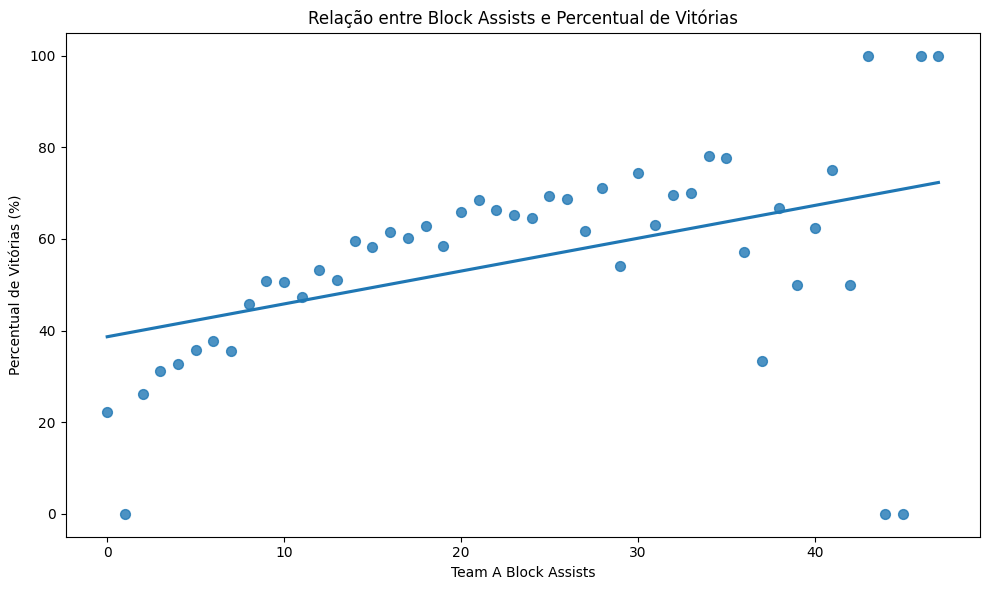

In [36]:
# Agrupar por quantidade de Block Assists e calcular a soma de vitórias (Result = 1) e o total de jogos
vitorias_por_block_assists = df.groupby('Team A Block Assists')['Result'].agg(['count', 'sum']).reset_index()

# Renomear colunas para facilitar a leitura
vitorias_por_block_assists.columns = ['Block Assists', 'Total Jogos', 'Vitórias']

# Calcular a porcentagem de vitórias
vitorias_por_block_assists['Percentual de Vitórias'] = (vitorias_por_block_assists['Vitórias'] / vitorias_por_block_assists['Total Jogos']) * 100

# Criar o gráfico de dispersão com a linha de tendência
plt.figure(figsize=(10, 6))
sns.regplot(x='Block Assists', y='Percentual de Vitórias', data=vitorias_por_block_assists, scatter_kws={'s':50}, ci=None)
plt.title('Relação entre Block Assists e Percentual de Vitórias')
plt.xlabel('Team A Block Assists')
plt.ylabel('Percentual de Vitórias (%)')
plt.tight_layout()

# Exibir o gráfico
plt.show()


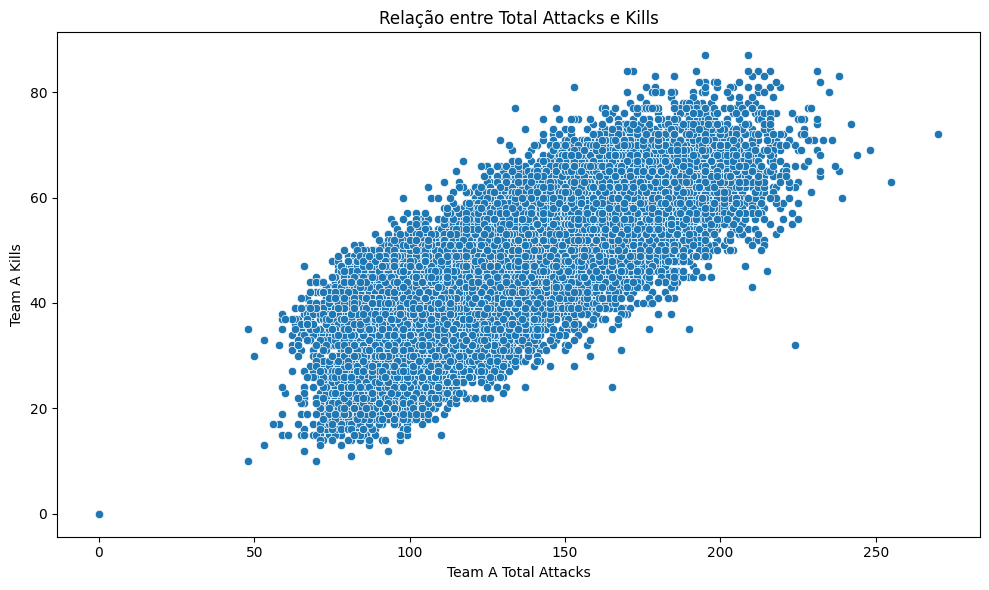

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criando o gráfico de dispersão (scatter plot) entre Kills e Total Attacks
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Team A Total Attacks', y='Team A Kills', data=df)

# Adicionando rótulos e título
plt.title('Relação entre Total Attacks e Kills')
plt.xlabel('Team A Total Attacks')
plt.ylabel('Team A Kills')

# Exibir o gráfico
plt.tight_layout()
plt.show()


C:\Users\gabri\AppData\Local\Temp\ipykernel_2120\2522995438.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skewness.index, y=skewness.values, palette='coolwarm')


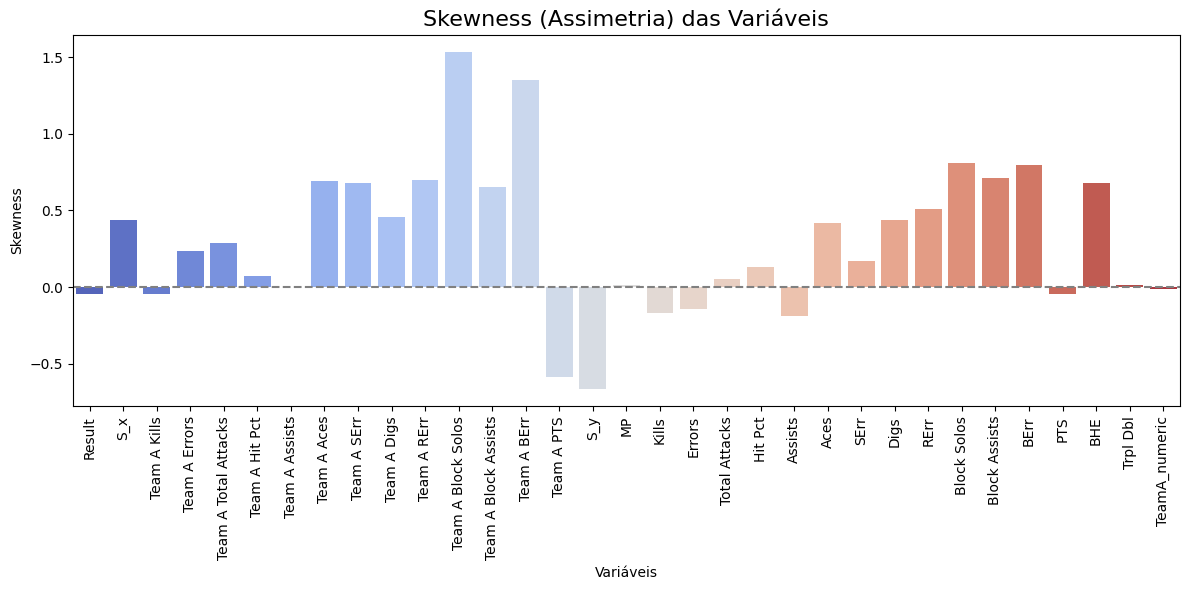

C:\Users\gabri\AppData\Local\Temp\ipykernel_2120\2522995438.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kurt.index, y=kurt.values, palette='coolwarm')


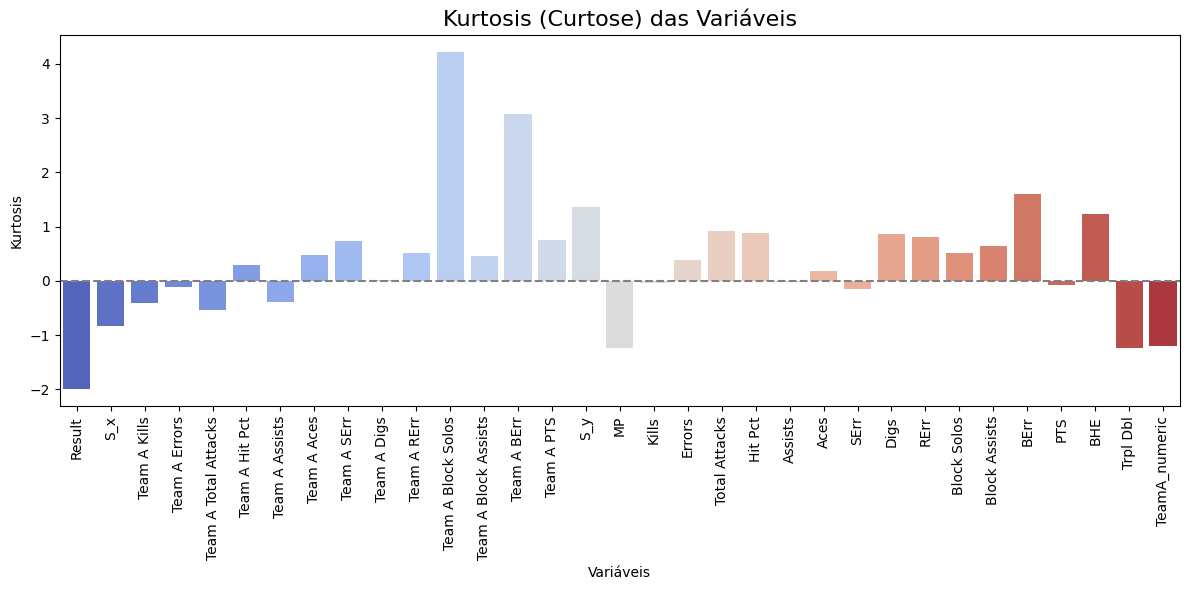

In [38]:
def plot_skewness_kurtosis(df):
    # Remover as colunas desnecessárias e colunas de intervalo (Interval)
    df_copy = df.drop(columns=['Date', 'TeamA', 'TeamB'], errors='ignore')

    # Selecionar apenas as colunas numéricas (excluindo Interval e outros tipos inválidos)
    df_numerico = df_copy.select_dtypes(include=[np.number])

    # Verificar se o DataFrame não está vazio
    if df_numerico.empty:
        print("Nenhuma coluna numérica encontrada após o filtro.")
        return

    # Calcular Skewness e Kurtosis
    skewness = df_numerico.apply(lambda x: skew(x.dropna()))
    kurt = df_numerico.apply(lambda x: kurtosis(x.dropna()))

    # Plot de skewness ajustando as labels
    plt.figure(figsize=(12, 6))
    sns.barplot(x=skewness.index, y=skewness.values, palette='coolwarm')
    plt.title('Skewness (Assimetria) das Variáveis', fontsize=16)
    plt.ylabel('Skewness')
    plt.xlabel('Variáveis')
    plt.xticks(rotation=90)  # Rotaciona as labels em 90 graus
    plt.axhline(0, color='gray', linestyle='--')
    plt.tight_layout()  # Ajusta o layout para não cortar as labels
    plt.show()

    # Plot de kurtosis ajustando as labels
    plt.figure(figsize=(12, 6))
    sns.barplot(x=kurt.index, y=kurt.values, palette='coolwarm')
    plt.title('Kurtosis (Curtose) das Variáveis', fontsize=16)
    plt.ylabel('Kurtosis')
    plt.xlabel('Variáveis')
    plt.xticks(rotation=90)  # Rotaciona as labels em 90 graus
    plt.axhline(0, color='gray', linestyle='--')
    plt.tight_layout()  # Ajusta o layout para não cortar as labels
    plt.show()

# Exemplo de uso da função
plot_skewness_kurtosis(df)

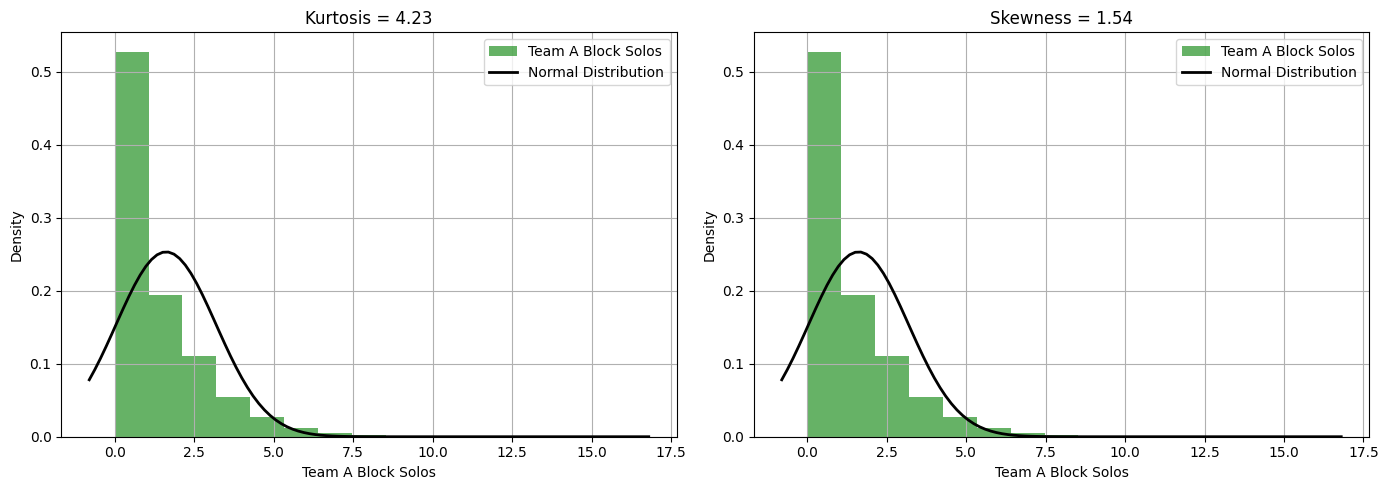

In [44]:
from scipy.stats import skew
from scipy.stats import kurtosis, norm


data = df['Team A Block Solos']
kurt_val = kurtosis(data)
skew_val = skew(data)

# Creating subplots for Kurtosis and Skewness
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))


# Plotting the histogram and normal distribution for Kurtosis
ax1.hist(data, bins=15, density=True, alpha=0.6, color='g', label='Team A Block Solos')
ax1.plot(x, p, 'k', linewidth=2, label='Normal Distribution')
ax1.set_title(f'Kurtosis = {kurt_val:.2f}')
ax1.set_xlabel('Team A Block Solos')
ax1.set_ylabel('Density')
ax1.legend()
ax1.grid(True)

# Plotting the histogram and normal distribution for Skewness
ax2.hist(data, bins=15, density=True, alpha=0.6, color='g', label='Team A Block Solos')
ax2.plot(x, p, 'k', linewidth=2, label='Normal Distribution')
ax2.set_title(f'Skewness = {skew_val:.2f}')
ax2.set_xlabel('Team A Block Solos')
ax2.set_ylabel('Density')
ax2.legend()
ax2.grid(True)

# Displaying the subplots
plt.tight_layout()
plt.show()


In [ ]:
skew_val = skew(data)

# Plotting the histogram of the 'Team A Block Solos' data
plt.hist(data, bins=15, density=True, alpha=0.6, color='g', label='Team A Block Solos')

# Plotting the normal distribution for comparison
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

# Adding details to the plot
plt.title(f'Skewness = {skew_val:.2f}')
plt.xlabel('Team A Block Solos')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# Displaying the plot
plt.show()

In [39]:
df.describe()

,Result,S_x,Team A Kills,Team A Errors,Team A Total Attacks,Team A Hit Pct,Team A Assists,Team A Aces,Team A SErr,Team A Digs,...,SErr,Digs,RErr,Block Solos,Block Assists,BErr,PTS,BHE,Trpl Dbl,TeamA_numeric
count,27470.000000,27470.000000,27470.000000,27470.000000,27470.000000,27470.000000,27470.000000,27470.000000,27470.000000,27470.000000,...,27470.000000,27470.000000,27470.000000,27470.000000,27470.000000,27470.000000,27470.000000,27470.000000,27470.000000,27470.000000
mean,0.511867,3.719767,46.887696,19.792428,131.086713,0.209544,43.730288,4.717801,7.119367,55.508118,...,216.349845,1684.615717,139.986637,49.115508,367.942941,49.467516,1782.339596,34.796050,16.187696,121.662614
std,0.499868,0.786383,12.436060,6.637377,32.827489,0.092054,11.805992,2.757998,3.324138,17.570591,...,35.915614,196.133360,24.741626,13.385199,77.987203,11.973275,203.257030,11.878496,7.839256,70.225486
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.151000,0.000000,0.000000,0.000000,0.000000,...,114.000000,1161.000000,77.500000,23.250000,163.500000,20.500000,1245.750000,8.750000,2.000000,0.000000
25%,0.000000,3.000000,38.000000,15.000000,104.000000,0.149000,35.000000,3.000000,5.000000,42.000000,...,190.750000,1558.000000,124.250000,39.250000,315.500000,42.500000,1679.875000,26.500000,9.000000,61.000000
50%,1.000000,4.000000,47.000000,20.000000,128.000000,0.209000,43.000000,4.000000,7.000000,54.000000,...,216.000000,1660.750000,138.000000,47.250000,352.000000,49.250000,1787.750000,33.500000,17.000000,122.000000
75%,1.000000,4.000000,56.000000,24.000000,156.000000,0.268000,52.000000,6.000000,9.000000,67.000000,...,240.750000,1792.750000,154.500000,55.500000,422.000000,56.500000,1901.875000,41.500000,23.000000,183.000000
max,1.000000,5.000000,87.000000,50.000000,270.000000,0.652000,83.000000,20.000000,26.000000,130.000000,...,310.000000,2358.500000,227.500000,97.500000,682.750000,102.000000,2324.625000,91.500000,33.000000,242.000000
